<a href="https://colab.research.google.com/github/jmpantoja/colab/blob/main/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

6


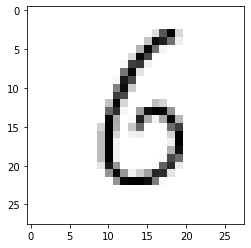

In [15]:
plt.imshow(x_train[18], cmap=plt.cm.binary)
print(y_train[18])

In [19]:
print(x_train.shape, x_train.size, x_train.ndim)

(60000, 28, 28) 47040000 3
